### Import libraries 

In [1]:
# Importing required Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white')

## Load data from final csv

In [2]:
train = pd.read_csv("final_train.csv")

In [3]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'ApplicantIncome_log'],
      dtype='object')

In [4]:
y = train.Loan_Status
X = train.drop('Loan_Status',axis=1)

In [5]:
X.drop(['LoanAmount','ApplicantIncome','CoapplicantIncome'],axis=1, inplace=True)

In [6]:
X=pd.get_dummies(X)

In [7]:
X.columns

Index(['Dependents', 'Loan_Amount_Term', 'Credit_History', 'LoanAmount_log',
       'ApplicantIncome_log', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'Self_Employed_No', 'Self_Employed_Yes', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

## Build Model using Logistic Regression

In [9]:
# Importing packages logistic regression and evaluation 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### Split data into train and test data 

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [11]:
# logistic regression   
model = LogisticRegression()
model.fit(X_train,y_train)

e:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
# Check model's performance with train data 
model.score(X_train,y_train)

0.8044806517311609

In [13]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score :',score)   

Accuracy_score : 0.8292682926829268


### Display confusion matrix

In [14]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[14, 19],
       [ 2, 88]], dtype=int64)

In [18]:
print('Accuracy : ',(cm[0,0] + cm[1,1]) / len(y_test))

Accuracy :  0.8292682926829268


In [23]:
print("True Positive rate : ", cm[1,1] / ( cm[1,0] + cm[1,1]))

True Positive rate :  0.9777777777777777


In [24]:
print("True Negative rate : ", cm[0,0] / (cm[0,0] + cm[0,1]) )

True Negative rate :  0.42424242424242425


### Display classification report

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.82      0.98      0.89        90

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [16]:
model.score(X_train,y_train)

1.0

In [17]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.6666666666666666


In [18]:
confusion_matrix(y_test, y_pred)

array([[19, 14],
       [27, 63]], dtype=int64)

In [101]:
from sklearn.metrics import precision_score

In [102]:
precision_score(y_test,y_pred)

0.8378378378378378

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.64      0.51        33
           1       0.84      0.69      0.76        90

    accuracy                           0.67       123
   macro avg       0.63      0.66      0.63       123
weighted avg       0.73      0.67      0.69       123



### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

e:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
model.score(X_train,y_train)

0.9898167006109979

In [22]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.7560975609756098


## KNN 

In [23]:
from sklearn.neighbors import KNeighborsClassifier

In [24]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
model.score(X_train,y_train)

0.7841140529531568

In [26]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)  

accuracy_score 0.7235772357723578


## Naive Bayes 

In [31]:
from sklearn.naive_bayes import GaussianNB

In [32]:
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.8292682926829268


## Support Vector Machines

In [27]:
from sklearn.svm import SVC

In [28]:
model = SVC()
model.fit(X_train,y_train)

e:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [29]:
y_pred = model.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('accuracy_score',score)   

accuracy_score 0.8130081300813008


## Check cross validation scores with different algorithms 

In [22]:
train = pd.read_csv("final_train.csv")
train_o = pd.read_csv("loan_train.csv")
y = train_o.Loan_Status

In [23]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log'],
      dtype='object')

In [24]:
train =pd.get_dummies(train)

In [25]:
train.shape

(614, 19)

In [26]:
train.columns

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'LoanAmount_log',
       'Gender_Female', 'Gender_Male', 'Married_No', 'Married_Yes',
       'Education_Graduate', 'Education_Not Graduate', 'Self_Employed_No',
       'Self_Employed_Yes', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 19 columns):
Dependents                 614 non-null int64
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
Loan_Status                614 non-null int64
LoanAmount_log             614 non-null float64
Gender_Female              614 non-null uint8
Gender_Male                614 non-null uint8
Married_No                 614 non-null uint8
Married_Yes                614 non-null uint8
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Self_Employed_No           614 non-null uint8
Self_Employed_Yes          614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
dtypes: flo

In [30]:
X = train
X.shape

(614, 19)

In [28]:
y.shape

(614,)

In [29]:
from sklearn.model_selection import cross_val_score
all_scores = {}

In [31]:
clf = LogisticRegression(random_state=1)
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuracy of LogisticRegression is %.2f%%' % (scores.mean()*100))
all_scores['LogisticRegression'] = ( scores.mean() * 100)

d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[1. 1. 1. 1. 1.]
The accuration of LogisticRegression is 100.00%


d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [33]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of GaussianNB is %.2f%%' % (scores.mean()*100))
all_scores['GaussianNB'] = scores.mean() * 100

[1.         0.98387097 0.99180328 0.98360656 1.        ]
The accuration of GaussianNB is 99.19%


In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
scores = cross_val_score(clf,X, y,cv=5)
print(scores)
print('The accuration of DecisionTreeClassifier is %.2f%%' % (scores.mean()*100))
all_scores['DecisionTreeClassifier'] = scores.mean() * 100

[1. 1. 1. 1. 1.]
The accuration of DecisionTreeClassifier is 100.00%


In [35]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier( n_estimators=10)
scores = cross_val_score(clf,X, y,cv=5)
print('The accuration of RandomForestClassifier is %.2f%%' % (scores.mean()*100))
all_scores['RandomForestClassifier'] = scores.mean() * 100

The accuration of RandomForestClassifier is 99.84%


[Text(0, 0, 'LogisticRegression'),
 Text(0, 0, 'GaussianNB'),
 Text(0, 0, 'DecisionTreeClassifier'),
 Text(0, 0, 'RandomForestClassifier')]

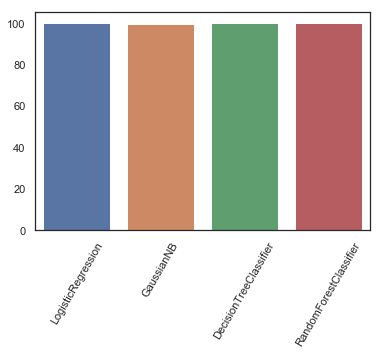

In [36]:
all_scores.keys()
all_scores.values()
plt = sns.barplot(x = list(all_scores.keys()), y = list(all_scores.values()))
plt.set_xticklabels(labels = all_scores.keys(),rotation=60)

### Logestic Regression with built-in Cross Validation

In [193]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(cv=5, random_state=0).fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [195]:
y_pred = clf.predict(X_test)
score = accuracy_score(y_test,y_pred)
print('Accuracy_score : ',score)   

Accuracy_score :  0.8051948051948052
